# Regression with Dummy Variables and Interaction Terms

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Dummy / Categorical Variable
df = pd.read_csv('../Data/mood.csv')
df.head()

,happy,stress,exercise,sleep,freetime
0,7.5,5.6,1,12.6,4
1,1.6,9.8,1,2.9,1
2,6.1,7.4,1,13.8,1
3,4.8,5.6,1,5.0,3
4,8.1,5.2,1,11.0,4


In [6]:
model = sm.OLS.from_formula('happy ~ stress + exercise', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     78.92
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           4.51e-21
Time:                        18:10:25   Log-Likelihood:                -152.47
No. Observations:                 100   AIC:                             310.9
Df Residuals:                      97   BIC:                             318.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3622      0.316     29.668      0.000       8.736       9.989
stress        -0.7079      0.058    -12.285      0.000      -0.822      -0.594
exercise       0.8941      0.256      3.490      0.001       0.386       1.402
==============================================================================
Omnibus:                        1.009   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.525
Skew:                          -0.070   Prob(JB):                        0.769
Kurtosis:                       3.327   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
results.params

Intercept    9.362238
stress      -0.707925
exercise     0.894058
dtype: float64

/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/3805330972.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = results.params[0]
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/3805330972.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = results.params[1]
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/3805330972.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b2 = r

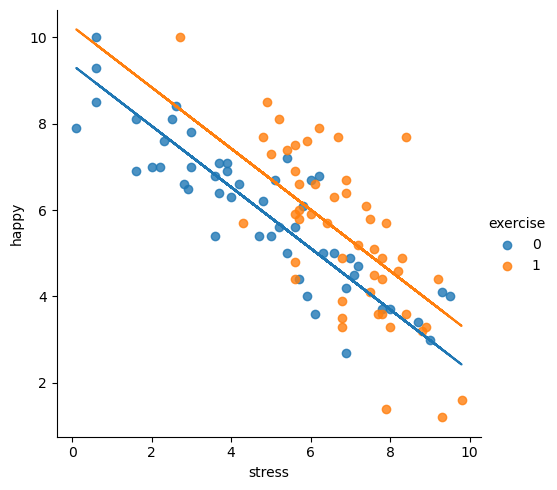

In [8]:
stress = df.stress
exercise = df.exercise

b0 = results.params[0]
b1 = results.params[1]
b2 = results.params[2]

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_wi_ex = b0 + (b1 * stress) + (b2 * 1) 

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=df)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_wi_ex)

In [12]:
#Categorical interaction term - Slopes and intercepts vary
model = sm.OLS.from_formula('happy ~ stress + exercise + stress:exercise', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     59.07
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.00e-21
Time:                        18:15:43   Log-Likelihood:                -148.47
No. Observations:                 100   AIC:                             304.9
Df Residuals:                      96   BIC:                             315.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.9179      0.343     26.008      0.000       8.237       9.599
stress             -0.6139      0.065     -9.468      0.000      -0.743      -0.485
exercise            3.1357      0.830      3.776      0.000       1.487       4.784
stress:exercise    -0.3574      0.126     -2.828      0.006      -0.608      -0.107
==============================================================================
Omnibus:                        3.583   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                4.034
Skew:                           0.035   Prob(JB):                        0.133
Kurtosis:                       3.981   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/851277450.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = results.params[0] #intercept
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/851277450.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = results.params[1] #stress
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/851277450.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

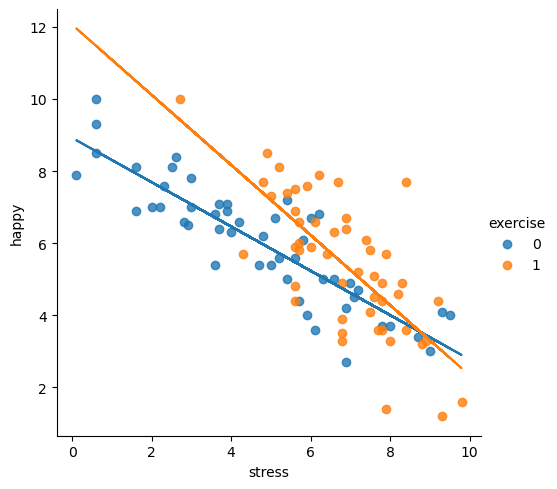

In [14]:
stress = df.stress
exercise = df.exercise

b0 = results.params[0] #intercept
b1 = results.params[1] #stress
b2 = results.params[2] #exercise
b3 = results.params[3] #stress * exercise (interaction)

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_w_ex = b0 + (b1 * stress) + (b2 * 1) + (b3 * stress * 1)

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=df)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_w_ex)

/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/2317190816.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = results.params[0]
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/2317190816.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = results.params[1]
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_79654/2317190816.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b2 = 

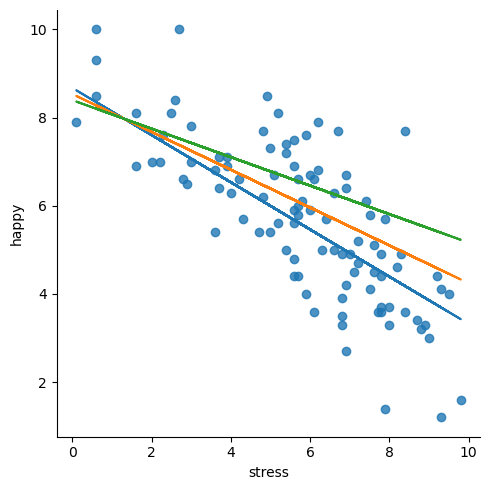

In [16]:
#Continuous interaction term
model = sm.OLS.from_formula('happy ~ stress + sleep + stress:sleep', data=df)
results = model.fit()
stress = df.stress
exercise = df.exercise
sleep = df.sleep

b0 = results.params[0]
b1 = results.params[1]
b2 = results.params[2]
b3 = results.params[3]

happy_sleep6 = b0 + (b1 * stress) + (b2 * 6) + (b3 * stress * 6)
happy_sleep9 = b0 + (b1 * stress) + (b2 * 9) + (b3 * stress * 9)
happy_sleep12 = b0 + (b1 * stress) + (b2 * 12) + (b3 * stress * 12)

sns.lmplot(x='stress', y='happy', fit_reg=False, data=df)
plt.plot(stress, happy_sleep6)
plt.plot(stress, happy_sleep9)
plt.plot(stress, happy_sleep12)